In [1]:
# 2. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### 3. The data has been cleaned and verified in the previous tasks.

In [4]:
# Define path
path = r'C:\Users\User\Documents\Career Foundry\Data Analytics Immersion\Data Immersion 6. Advanced Analytics & Dashboard Design'

# Import my dataset from the Excel file
df = pd.read_excel(os.path.join(path, '6.2', 'flavors_of_cacao_cleaned.xlsx'))

In [5]:
print(df.columns)

Index(['ref', 'company_name', 'company_location', 'review_date',
       'country_of_bean_origin', 'bean_origin_or_bar', 'cocoa_percent',
       'ingredients', 'memorable_characteristics', 'rating'],
      dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ref                        2693 non-null   int64         
 1   company_name               2693 non-null   object        
 2   company_location           2693 non-null   object        
 3   review_date                2693 non-null   datetime64[ns]
 4   country_of_bean_origin     2693 non-null   object        
 5   bean_origin_or_bar         2693 non-null   object        
 6   cocoa_percent              2693 non-null   float64       
 7   ingredients                2693 non-null   object        
 8   memorable_characteristics  2693 non-null   object        
 9   rating                     2693 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 210.5+ KB
None


### Data Prep for Regression Analysis

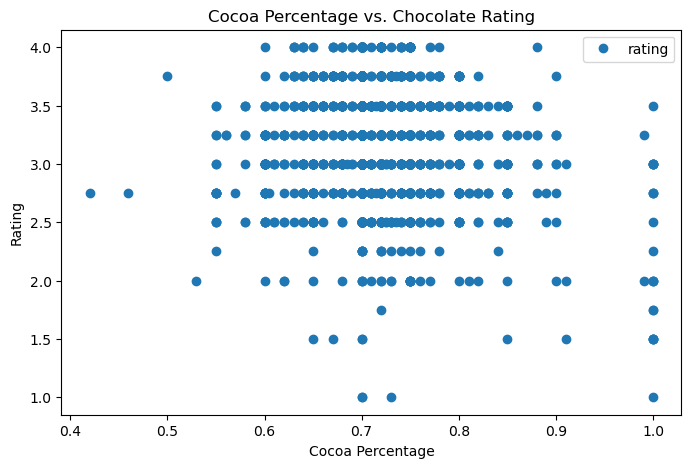

In [8]:
# 4. Create a scatterplot using Matplotlib
df.plot(x='cocoa_percent', y='rating', style='o', figsize=(8, 5))  # 'o' creates a scatterplot

# Titles and labels
plt.title('Cocoa Percentage vs. Chocolate Rating')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')

# Show the plot
plt.show()

### 5. Hypothesis to test: Chocolates with cocoa percentages above 70% are rated lower compared to those with cocoa percentages between 60%-70%.

### For the purpose of this task, I have simplified the hypothesis to: The higher the cocoa percentage, the lower the rating.

In [10]:
# 6. Reshape the variables into NumPy arrays
X = df['cocoa_percent'].values.reshape(-1, 1)  # Independent variable (Cocoa Percentage)
y = df['rating'].values.reshape(-1, 1)  # Dependent variable (Chocolate Rating)

In [11]:
# 7. Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [13]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [14]:
# 8a. Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# 8b. Predict the values of y using X.

y_predicted = regression.predict(X_test)

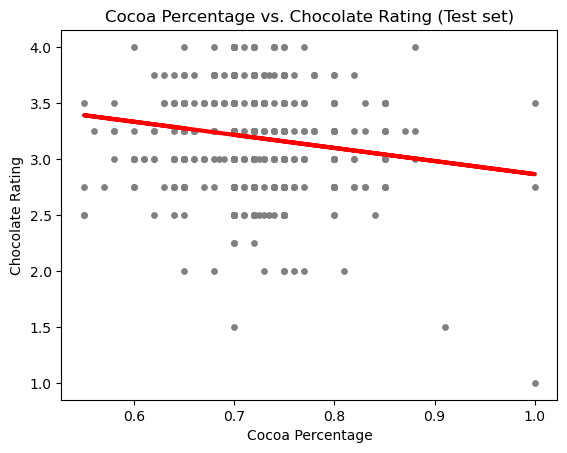

In [16]:
# 9. Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Cocoa Percentage vs. Chocolate Rating (Test set)')
plot_test.xlabel('Cocoa Percentage')
plot_test.ylabel('Chocolate Rating')

# Save the plot
plot_test.savefig("cocoa_rating_regression.png", dpi=300, bbox_inches='tight')

# Display the plot
plot_test.show()

### 10. The downward slope suggests that higher cocoa percentages are linked to lower ratings, supporting the hypothesis. However, the data points are widely scattered, indicating that cocoa percentage alone is a weak predictor. 

In [18]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [19]:
# 11. Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.17002502]]
Mean squared error:  0.1858025719187346
R2 score:  0.010949655713235584


### The slope (-1.170) indicates that as cocoa percentage increases by 1%, the predicted rating drops by 1.17 points. This supports the hypothesis that higher cocoa content leads to lower ratings.

### However, the R² score (0.011) shows that only 1.1% of the variation in ratings is explained by cocoa percentage, meaning it is a very weak predictor. Most of the rating differences are likely due to other factors like brand, country of origin, or ingredients.

### Although the low MSE (0.1858) means the predictions are fairly close to the actual ratings, the model doesn’t explain much about why ratings vary. This suggests that cocoa percentage alone isn’t a strong factor in determining chocolate ratings.

In [21]:
# 12. Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.00,3.214891
1,3.50,3.214891
2,3.00,3.132990
3,3.25,3.214891
4,3.75,3.214891
5,3.75,3.238292
6,3.00,3.214891
7,3.25,3.214891
8,3.00,3.285093
9,3.75,3.238292


## 13.
### Model Performance

The model suggests a negative relationship between cocoa percentage and chocolate ratings, but its low R² score indicates that cocoa percentage alone is not a strong predictor. While the low MSE suggests that predictions are close to actual ratings, the model fails to explain most of the variation in ratings, meaning other factors (or multiple factors) likely have a stronger impact

### Possible Data Bias 
The lower ratings for chocolates with more than 70% cocoa may be due to their intense bitterness, making them less enjoyable for many consumers. This doesn’t necessarily reflect a lower quality but rather a preference-based rating. Meanwhile, chocolates in the 60-70% range tend to receive higher ratings because they strike a balance—they are bitter enough to be perceived as high quality but not so bitter that they become unpleasant to eat.